In [1]:
import pandas as pd

df=pd.read_excel('C:/Users/vikra/.spyder-py3/CMC Database.xlsx', sheet_name = 'Sheet4', header=0)

print(df)

     Serial No.  Surfactant No.        Charge           Surfactant Name  \
0             1             1.0       Anionic  Sodium Dodecyl 1 Sulfate   
1             2             NaN       Anionic  Sodium Dodecyl 1 Sulfate   
2             3             2.0       Anionic    Sodium Octyl 1 Sulfate   
3             4             NaN       Anionic    Sodium Octyl 1 Sulfate   
4             5             3.0       Anionic    Sodium Decyl 1 Sulfate   
..          ...             ...           ...                       ...   
262         263           256.0  Zwitterionic  C12H25N+(CH3)2(CH2)5COO−   
263         264           257.0  Zwitterionic  C12H25N+(CH3)2(CH2)7COO−   
264         265           258.0  Zwitterionic     C8H17CH(COO-)N+(CH3)3   
265         266           259.0  Zwitterionic    C10H21CH(COO-)N+(CH3)3   
266         267           260.0  Zwitterionic    C12H25CH(COO-)N+(CH3)3   

    Formula                   Head Group  \
0       NaN                      Sulfate   
1       NaN

In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,267.0,134.000000,77.220464,1.000000,67.500000,134.000000,200.500000,267.000000
Surfactant No.,260.0,130.500000,75.199734,1.000000,65.750000,130.500000,195.250000,260.000000
Temp (oC),267.0,24.194757,1.855567,20.000000,25.000000,25.000000,25.000000,27.000000
CMC (M),267.0,0.028556,0.098809,0.000002,0.000335,0.003100,0.015950,0.910000
-log CMC,267.0,2.651781,1.212071,0.040959,1.797241,2.508638,3.474955,5.795880
2^-log(CMC),267.0,49.369483,94.124788,1.046025,7.202820,15.737098,45.496185,582.555821


In [3]:
# Identify target column (output). For this example, wine quality is the target property
target = ['-log CMC']
# Identify features (inputs)
features = (list(set(list(df.columns))-set(target)))
# Print features
features

['Charge',
 'SMILES Representation',
 'Serial No.',
 'Temp (oC)',
 '2^-log(CMC)',
 'Surfactant Name',
 'Formula',
 'Head Group',
 'Surfactant No.',
 'CMC (M)']

In [4]:
headers = df.columns.tolist()
headers

['Serial No.',
 'Surfactant No.',
 'Charge',
 'Surfactant Name',
 'Formula',
 'Head Group',
 'SMILES Representation',
 'Temp (oC)',
 'CMC (M)',
 '-log CMC',
 '2^-log(CMC)']

In [5]:
df2 = df.drop(df.columns[[0,1,2,3,4,5,8,10]], axis= 1)

#df2 = df2.loc[0:8, :]
#df2 = df2.reset_index()
#df2 = df2.drop(['index'], axis= 1)

df2

,SMILES Representation,Temp (oC),-log CMC
0,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],20,2.072117
1,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],25,2.080922
2,CCCCCCCCOS(=O)(=O)[O-].[Na+],20,0.873869
3,CCCCCCCCOS(=O)(=O)[O-].[Na+],25,0.885056
4,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],20,1.474955
...,...,...,...
262,CCCCCCCCCCCC[N+](C)(C)CCCCCC(=O)[O-],25,2.585027
263,CCCCCCCCCCCC[N+](C)(C)CCCCCCCC(=O)[O-],25,2.823909
264,CCCCCCCCC(C(=O)[O-])[N+](C)(C)C,27,1.013228
265,CCCCCCCCCCC(C(=O)[O-])[N+](C)(C)C,27,1.886057


In [6]:
#Checks to see if there is any null values within each of the columns of the database.
df2.isnull().sum()

SMILES Representation    0
Temp (oC)                0
-log CMC                 0
dtype: int64

In [7]:
import numpy as np
import rdkit as rd
from rdkit import Chem, DataStructs, rdBase
#draw the molecules
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AtomPairs
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

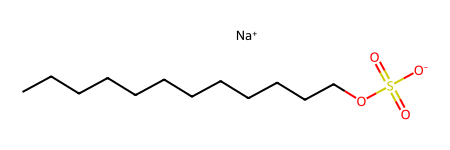

In [8]:
smile = df2.iloc[0,0]
mol = Chem.MolFromSmiles(smile)
mol

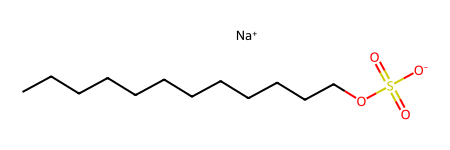

In [9]:
smile = df2.iloc[1,0]
mol = Chem.MolFromSmiles(smile)
mol

In [10]:
#Create a function that will convert the smiles into a morgan fingerprint
def MoleculeGen(rad: int, dataframe: pd.DataFrame) -> pd.DataFrame:
    #initilise empty lists for holding the mol drawings and morgan fingerprints
    mol_list = []
    fin_list = []
    i = 0
    
    for smile in dataframe['SMILES Representation']:
        i += 1
        try:
            #Generate the molecular drawing of the smile
            mol = Chem.MolFromSmiles(smile)
            mol_list.append(mol)
            #Generate the morgan fingerprint of the smile in question
            mf_bitvect = AllChem.GetMorganFingerprintAsBitVect(mol, radius= rad, nBits= 256)
            #initialise a temporary array that will have the bit vector mapped onto to convert from bit vector to numpy array\
            #(this is because we can only use np arrays and not bit vectors within python)
            temp = np.zeros((0,), dtype= np.int8)
            DataStructs.ConvertToNumpyArray(mf_bitvect, temp)
            fin_list.append(temp)
           
        except:
            print(i, smile)
    #convert the np array to a dataframe that we can then add to the main dataframe in question
    fin_list = pd.DataFrame(fin_list)
    #Add the fingerprint list to the main dataframe along the columns (axis = 1)
    dataframe = pd.concat([dataframe, fin_list], axis= 1)
    return dataframe

In [11]:
#Call the function to generate the fingerprints
df3 = MoleculeGen(15, df2)



[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerat

[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerator
[13:00:54] DEPRECATION WARNING: please use MorganGenerat

In [12]:
#Principal Component Analysis

data_for_pca = df3.drop(df3.columns[[0,1,2]], axis= 1)

from sklearn.decomposition import PCA
pca_x = PCA(n_components=64)

pca_x_data = pca_x.fit_transform(data_for_pca) #gets x_data as a numpy array

mfp_data_DF = pd.DataFrame(data = pca_x_data)

df3 = pd.concat([df3.iloc[:,0:3], mfp_data_DF], axis=1)

df3

,SMILES Representation,Temp (oC),-log CMC,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],20,2.072117,-1.619419,-1.914302,-0.902894,-1.857181,0.229905,0.710978,2.865048,...,0.039862,0.073199,-0.098089,-0.029249,0.006587,0.164082,0.213701,-0.013984,-0.097630,-0.031486
1,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],25,2.080922,-1.619419,-1.914302,-0.902894,-1.857181,0.229905,0.710978,2.865048,...,0.039862,0.073199,-0.098089,-0.029249,0.006587,0.164082,0.213701,-0.013984,-0.097630,-0.031486
2,CCCCCCCCOS(=O)(=O)[O-].[Na+],20,0.873869,-2.420282,-1.682625,-1.435392,-1.220507,-0.524845,0.227562,2.282545,...,0.017424,0.125464,-0.015112,-0.069637,-0.007651,0.243849,0.098729,0.113550,0.237959,0.081986
3,CCCCCCCCOS(=O)(=O)[O-].[Na+],25,0.885056,-2.420282,-1.682625,-1.435392,-1.220507,-0.524845,0.227562,2.282545,...,0.017424,0.125464,-0.015112,-0.069637,-0.007651,0.243849,0.098729,0.113550,0.237959,0.081986
4,CCCCCCCCCCOS(=O)(=O)[O-].[Na+],20,1.474955,-1.832343,-1.853046,-1.136262,-1.780857,-0.115272,0.446607,2.463430,...,0.195653,-0.021424,-0.011080,0.346970,0.043645,-0.395135,0.100327,0.044774,-0.098644,-0.180365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,CCCCCCCCCCCC[N+](C)(C)CCCCCC(=O)[O-],25,2.585027,-1.368693,-0.193930,1.729562,-0.057583,-1.355929,2.976962,-0.890790,...,-0.215945,-0.281170,-0.558834,-0.153959,-0.161735,-0.181325,-0.098241,-0.289820,0.282582,0.360113
263,CCCCCCCCCCCC[N+](C)(C)CCCCCCCC(=O)[O-],25,2.823909,-0.797277,-0.196887,1.572968,0.149860,-1.358102,2.964587,-1.611295,...,-0.025119,-0.666812,-0.646905,0.063243,0.152225,0.402829,0.542446,0.200421,1.024182,0.055479
264,CCCCCCCCC(C(=O)[O-])[N+](C)(C)C,27,1.013228,-2.288809,-0.142681,-0.336910,-0.117457,-0.972235,-1.253216,-0.101284,...,-0.414476,-0.782808,0.164611,0.280810,0.217121,0.653569,-0.529593,0.244172,-0.760953,0.203583
265,CCCCCCCCCCC(C(=O)[O-])[N+](C)(C)C,27,1.886057,-2.320429,-0.077248,0.278750,-0.349695,-0.668677,-1.056163,-0.008627,...,-0.320909,-0.281473,0.300353,0.500803,-0.192684,0.735494,-0.624830,-0.004233,-0.621200,0.110301


In [13]:
#drop the smile columns since this will  not be passed to the machine learning model
df3 = df3.drop(['SMILES Representation'], axis = 1)
#denote the target heading
target = ['-log CMC']
#define all other headings as the input features for the model
features = (list(set(list(df3.columns))-set(target)))
#get the values of the input features and output features
x_data = df3[features].values
y_data = df3[target].values
x_data.shape

(267, 65)

In [14]:
# Import scikit learn classifier and regressor.
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Tool for splitting sets. Needed to split training and test data
from sklearn.model_selection import train_test_split

# Module to normalized data
from sklearn import preprocessing

# Tool for calculation of the mean square error (mse)
from sklearn.metrics import mean_squared_error

# Tool for calculating R2 score
from sklearn.metrics import r2_score

# Split data for training and testing. In this example, the splits is 80:20
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=39,shuffle=True)

print(x_train.shape)
print(x_test.shape)

(213, 65)
(54, 65)


In [15]:
x_train[0]

array([-1.23387599e+00, -6.14313427e-01, -6.74182668e-01,  5.12027691e-01,
       -9.39237081e-01, -3.79713603e-01,  1.32187024e+00,  2.68778006e+00,
       -1.42501989e+00, -5.40615058e-01, -2.23786347e-01,  4.23095322e-01,
        6.22892628e-01, -7.56224118e-02, -3.73984975e-03,  2.50000000e+01,
       -1.27851623e+00, -6.56516805e-01, -4.39657254e-02,  7.79580960e-01,
        1.12242232e-01, -1.30671889e+00, -1.78914493e-01,  5.04113557e-01,
        6.67571806e-01, -3.11763022e-01, -1.44233680e-01, -9.91459728e-01,
       -6.46964712e-01, -1.17293479e+00, -2.14889126e-01,  3.48819446e-01,
       -8.81109715e-02,  7.44580654e-01,  6.66535682e-01,  2.53790165e-01,
       -2.54823500e-01,  1.02510679e+00,  5.22357642e-01, -1.79185984e-01,
        5.80107242e-01, -2.07641629e-01,  4.12565051e-01, -7.43771409e-01,
        1.92560992e-01,  2.93611957e-01,  2.65908967e-01,  1.56684144e-01,
       -7.07249689e-02, -4.03503211e-01, -7.11836246e-02,  1.07488108e+00,
       -4.45689894e-02, -

In [16]:
x_train[1]

array([-2.12645720e+00,  2.00549824e-01, -3.61778061e-01,  1.25830339e+00,
       -1.40976878e+00, -5.10203642e-01, -1.62533613e+00,  3.24558322e-01,
       -7.77116295e-01, -1.01350601e+00,  1.07767329e+00,  7.37322603e-01,
        7.76828752e-01,  1.61577301e+00, -2.09945777e-02,  2.50000000e+01,
       -2.49982517e-01, -1.59189236e-01, -5.71416098e-01, -1.69309032e+00,
       -9.62776855e-01, -6.37823493e-01,  4.21211559e-01,  9.15592728e-01,
        2.70637718e-01,  1.43853124e-01, -2.66945289e-01, -1.03464203e+00,
        1.59857219e+00,  2.39062558e-01, -3.17049134e-01, -2.99571025e-01,
        2.89961854e-01, -3.33637527e-01,  5.06187267e-01,  1.98012969e-01,
       -1.65771763e-02,  4.24185880e-02,  3.93773869e-01, -3.57573195e-01,
       -2.91080086e-01, -8.97503519e-03,  6.92217612e-01, -1.72646293e-01,
       -4.99838299e-02,  1.42463187e-01, -4.38534519e-01,  4.03509271e-01,
       -2.08145175e-01,  2.56902615e-01,  4.32158217e-01, -4.16718102e-02,
        2.39507525e-01,  

In [17]:
x_train[0] == x_train[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [18]:
# Create an Artificial Neural Network architecture 
clf = MLPRegressor(hidden_layer_sizes=(7,),solver='lbfgs',alpha=1e-5,random_state=5,max_iter=2000)

# Fit data to the ANN
clf.fit(x_train,y_train.ravel())
r2 = clf.score(x_train,y_train.ravel())
print('The R2 after fitting is: {0:6.5f}'.format(r2))

The R2 after fitting is: 0.88844


In [19]:
# Use the optimized neural network to predict the output
predict_train_set = clf.predict(x_train)
predict_test_set = clf.predict(x_test)
mse=mean_squared_error(y_data, clf.predict(x_data), squared=False)
print(mse)

0.46023933038246373


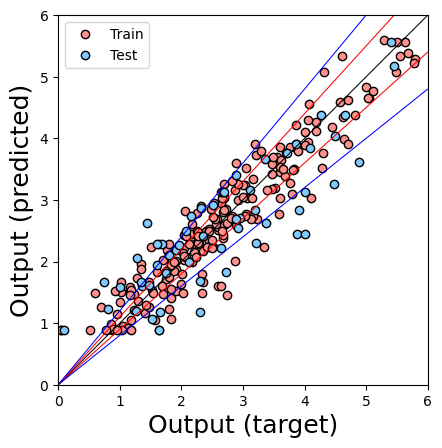

In [20]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,8))
ax1=plt.subplot(1, 1, 1)

ax1.plot(y_train,predict_train_set,marker='o',ls='None',mec='k',mfc='#FF908C',label='Train')
ax1.plot(y_test,predict_test_set,marker='o',ls='None',mec='k',mfc='#80CAFF',label='Test')
ax1.legend()


graph_size = 6


ax1.plot([0,graph_size],[0,graph_size],'-k',lw=0.75)
ax1.plot([0,graph_size],[0,graph_size*0.9],'-r',lw=0.75)
ax1.plot([0,graph_size],[0,graph_size*1.1],'-r',lw=0.75)
ax1.plot([0,graph_size],[0,graph_size*0.8],'-b',lw=0.75)
ax1.plot([0,graph_size],[0,graph_size*1.2],'-b',lw=0.75)


ax1.set_xlim([0,graph_size])
ax1.set_ylim([0,graph_size])
ax1.set_xlabel('Output (target)',size=18)
ax1.set_ylabel('Output (predicted)',size=18)
#ax1.grid()
plt.gca().set_aspect('equal', adjustable='box')





In [21]:
#Specify radius range
radius = 30

R2_MSE_values = np.zeros((radius,3))

for i in range(1,radius+1):
    #Call the function to generate the fingerprints
    df3 = MoleculeGen(i, df2)
    
    #drop the smile columns since this will  not be passed to the machine learning model
    df3 = df3.drop(['SMILES Representation'], axis = 1)
    #denote the target heading
    target = ['-log CMC']
    #define all other headings as the input features for the model
    features = (list(set(list(df3.columns))-set(target)))
    #get the values of the input features and output features
    x_data = df3[features].values
    y_data = df3[target].values
    
    
    # Split data for training and testing. In this example, the splits is 80:20
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=5,shuffle=True)
    
    
    # Create an Artificial Neural Network architecture
    clf = MLPRegressor(hidden_layer_sizes=(7,),solver='lbfgs',alpha=1e-5,random_state=5,max_iter=2000)
    
    # Fit data to the ANN
    clf.fit(x_train,y_train.ravel())
    r2 = clf.score(x_train,y_train.ravel())
    R2_MSE_values[i-1,0] = r2
    
    
    # Use the optimized neural network to predict the output
    predict_train_set = clf.predict(x_train)
    predict_full_set = clf.predict(x_data)
    predict_test_set = clf.predict(x_test)
    
    mse = mean_squared_error(y_data, clf.predict(x_data), squared=False)
    R2_MSE_values[i-1,1] = mse
    
    test_mse = mean_squared_error(y_test, clf.predict(x_test), squared=False)
    R2_MSE_values[i-1,2] = test_mse
    

    

[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerator
[13:01:00] DEPRECATION WARNING: please use MorganGenerat

[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerator
[13:01:03] DEPRECATION WARNING: please use MorganGenerat

[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerator
[13:01:05] DEPRECATION WARNING: please use MorganGenerat

[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerator
[13:01:07] DEPRECATION WARNING: please use MorganGenerat

C:\Users\vikra\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerato

[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:10] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerat

[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerator
[13:01:13] DEPRECATION WARNING: please use MorganGenerat

[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerat

[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerator
[13:01:19] DEPRECATION WARNING: please use MorganGenerat

[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerator
[13:01:22] DEPRECATION WARNING: please use MorganGenerat

[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerator
[13:01:25] DEPRECATION WARNING: please use MorganGenerat

[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerator
[13:01:28] DEPRECATION WARNING: please use MorganGenerat

[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerator
[13:01:31] DEPRECATION WARNING: please use MorganGenerat

[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerator
[13:01:34] DEPRECATION WARNING: please use MorganGenerat

[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerator
[13:01:36] DEPRECATION WARNING: please use MorganGenerat

[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerator
[13:01:39] DEPRECATION WARNING: please use MorganGenerat

[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerator
[13:01:41] DEPRECATION WARNING: please use MorganGenerat

[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerat

[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerator
[13:01:46] DEPRECATION WARNING: please use MorganGenerat

[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerator
[13:01:48] DEPRECATION WARNING: please use MorganGenerat

[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerator
[13:01:50] DEPRECATION WARNING: please use MorganGenerat

[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerator
[13:01:53] DEPRECATION WARNING: please use MorganGenerat

[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerator
[13:01:55] DEPRECATION WARNING: please use MorganGenerat

[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerator
[13:01:57] DEPRECATION WARNING: please use MorganGenerat

[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:01:59] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerator
[13:02:00] DEPRECATION WARNING: please use MorganGenerat

[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerator
[13:02:02] DEPRECATION WARNING: please use MorganGenerat

[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerator
[13:02:04] DEPRECATION WARNING: please use MorganGenerat

[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerator
[13:02:07] DEPRECATION WARNING: please use MorganGenerat

[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerator
[13:02:10] DEPRECATION WARNING: please use MorganGenerat

[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerator
[13:02:13] DEPRECATION WARNING: please use MorganGenerat

[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerator
[13:02:17] DEPRECATION WARNING: please use MorganGenerat

In [22]:
R2_MSE_values

array([[0.60593663, 0.88317255, 1.23910007],
       [0.66010569, 0.77482513, 0.98297408],
       [0.78599149, 0.70502002, 1.0940819 ],
       [0.86402925, 0.55157921, 0.83865823],
       [0.92073341, 0.42074118, 0.63902574],
       [0.98337152, 0.34573555, 0.70219158],
       [0.99198342, 0.20103834, 0.39065882],
       [0.99195169, 0.22575487, 0.45231135],
       [0.99273584, 0.23275491, 0.47441999],
       [0.99383535, 0.21978029, 0.45002213],
       [0.9933674 , 0.29430449, 0.62385395],
       [0.99354938, 0.34077827, 0.73225644],
       [0.99461169, 0.32819775, 0.70770361],
       [0.99494757, 0.22402208, 0.46731098],
       [0.99493822, 0.21072202, 0.43558594],
       [0.99497273, 0.27274762, 0.58155813],
       [0.99494762, 0.23977979, 0.50449586],
       [0.99471638, 0.25002033, 0.52721379],
       [0.9949752 , 0.22010746, 0.45819852],
       [0.99497089, 0.29656102, 0.63657814],
       [0.99497482, 0.23168202, 0.48559186],
       [0.99470061, 0.23489337, 0.49152079],
       [0.

In [23]:
radii = range(1, radius+1)
radii

range(1, 31)

(0.5, 1.05)

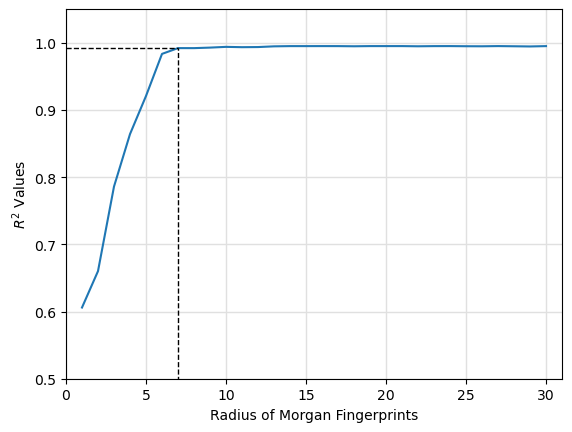

<Figure size 660x600 with 0 Axes>

In [24]:
from matplotlib.pyplot import figure

ax1=plt.subplot(1, 1, 1)

ax1.plot(radii, R2_MSE_values[:,0])

y = R2_MSE_values[6,0]

ax1.plot([7,7],[0,y],'--k',lw=1)
ax1.plot([0,7],[y,y],'--k',lw=1)

ax1.set_xlabel('Radius of Morgan Fingerprints')
ax1.set_ylabel('$R^2$ Values')

## Axes
ax1.titlesize : 24
ax1.labelsize : 24
    
## Grid
ax1.grid(True, color='#e0e0e0', which='both', linewidth=1)

## Figure property 
figure(figsize=(1.1, 1), dpi=600)

ax1.set_xlim([0,31])
ax1.set_ylim([0.5,1.05])

(0.0, 1.0)

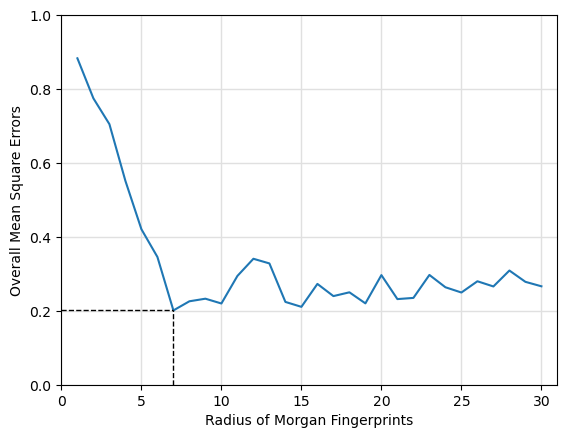

<Figure size 660x600 with 0 Axes>

In [25]:
ax2=plt.subplot(1, 1, 1)

ax2.plot(radii, R2_MSE_values[:,1])

y = R2_MSE_values[6,1]

ax2.plot([7,7],[0,y],'--k',lw=1)
ax2.plot([0,7],[y,y],'--k',lw=1)

ax2.set_xlabel('Radius of Morgan Fingerprints')
ax2.set_ylabel('Overall Mean Square Errors')

## Axes
ax2.titlesize : 24
ax2.labelsize : 24
    
## Grid
ax2.grid(True, color='#e0e0e0', which='both', linewidth=1)

## Figure property 
figure(figsize=(1.1, 1), dpi=600)


ax2.set_xlim([0,31])
ax2.set_ylim([0,1])

(0.2, 1.5)

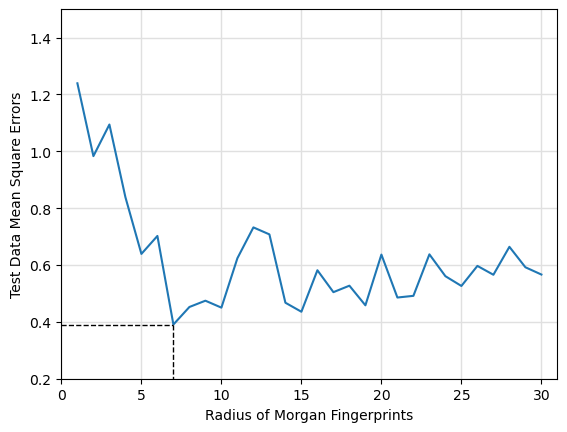

<Figure size 660x600 with 0 Axes>

In [26]:
ax3=plt.subplot(1, 1, 1)

ax3.plot(radii, R2_MSE_values[:,2])

y = R2_MSE_values[6,2]

ax3.plot([7,7],[0,y],'--k',lw=1)
ax3.plot([0,7],[y,y],'--k',lw=1)

ax3.set_xlabel('Radius of Morgan Fingerprints')
ax3.set_ylabel('Test Data Mean Square Errors')

## Axes
ax3.titlesize : 24
ax3.labelsize : 24
    
## Grid
ax3.grid(True, color='#e0e0e0', which='both', linewidth=1)

## Figure property 
figure(figsize=(1.1, 1), dpi=600)


ax3.set_xlim([0,31])
ax3.set_ylim([.2,1.5])